k-최근접 이웃 회기

In [ ]:
# 학습 알고리즘 종류 

# 1. 분류
#     - 샘플을 몇 개의 클래스 중 하나로 분류하는 문제

# 2. 회기(regression)
#     - 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제
#     - EX) 내년도 경제 성장률, 배달 도착 시간 예측
#     - 정해진 클래스가 없고 임의의 수치를 출력함.

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

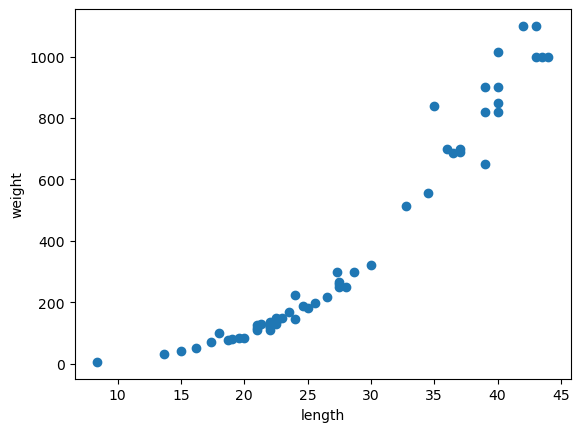

In [3]:
# 데이터의 형태를 보기 위해 산점도 
import matplotlib.pyplot as plt 
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 농어 데이터를 머신러닝 모델에 사용하기 전 훈련 세트 / 테스트 세트로 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,
                                        random_state=42)

In [5]:
# 사이킷런에서 사용할 훈련 세트는 2차원 배열이어야 함.
#  앞에서는 두 개의 특성을 이용했기 때문에 자연스럽게 2차원 배열이었지만 지금은 1개 특성을 이용하므로 2차원 배열을 만들어 줘야 함.

#  배열의 크기를 바꿀 수 있는 numpy reshape() 메서드 사용

test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
# -1을 사용하면 그 자리의 숫자를 자동으로 채워줌.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


결정계수(R^2)

In [ ]:
# 최근에 사용했던 KNeiborsClassifier 와 비슷함.
# 객체 생성 후 fit() 메서드로 회귀 모델 훈련

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회기 모델 훈련
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [10]:
# score로 뽑아낸 점수 == 정확도 == 정답을 맞힌 개수의 비율
print(knr.score(test_input, test_target))

0.992809406101064


In [12]:
# 회기의 경우 정확한 답이 아닌 조금 다른 값으로 평가하는 데 
# 이 점수를 결정계수 (codfficient of determination)라고 함
# 또는 R^2 라고도 부름.

# ```R^2 = 1 - (타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합```

# 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함.
# 그 다음 타깃과 타깃의 평균의 차이을 제곱하여 더한 값으로 나눔

# >> 만약 타킷의 평균 정도를 예측하는 수준이라면 (분모와 분자가 비슷해짐) R^2는 0에 가까워짐.
# >> 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워지기 때문에) 1에 가까운 값이 됨.


# 타깃과 예측한 값 사이의 차이를 구할 수 있는 측정 도구!

# sklearn.metrics 패키지 안에서 mean_absoulte_error >> 타깃과 절대값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

# 19g 정도 타깃값과 다르다는 것 확인




19.157142857142862


In [13]:
# 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 점수 확인
print(knr.score(train_input, train_target))

0.9698823289099254


- 과대적합(Overfitting) : 훈련 세트에서 점수가 좋았는데 테스트 세트에서는 점수가 나쁜 것
- 과소적합(underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우
        - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

In [14]:
# 과소적합을 해결하는 방법 : k-최근접 이웃 알고리즘을 더 복잡하게 만들기

# 이웃의 개수 k를 줄이면 알고리즘을 더 복잡하게 만들 수 있음.
# 기본 k 값은 5

# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# k값을 줄였더니 훈련세트의 R^2 점수가 높아짐

0.9804899950518966


In [15]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [ ]:
# 테스트 세트 점수가 훈련세트보다 낮아지고 두 점수 차이가 크지 않게 변함.

다시 한 번 코딩 연습

주어진 농어 데이터 산점도로 확인



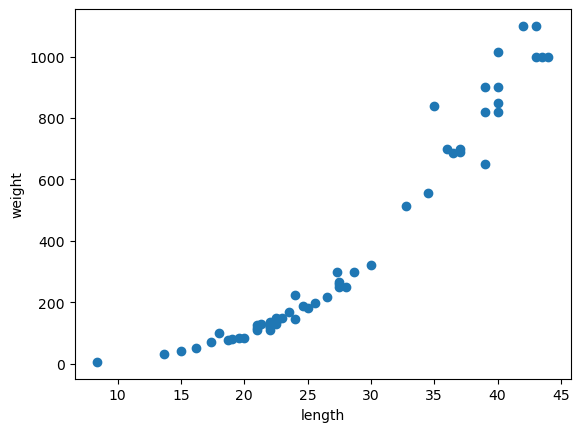


데이터 훈련 데이터와 테스트 데이터로 나누기

결정계수 R^2 사용하여 k-최근접 이웃 회기 모델 훈련
훈련데이터 검증:  0.9698823289099254
테스트 데이터로 검증: 0.992809406101064

테스트에 대한 예측 만들기

테스트 세트에 대한 평균 절대값 오차 계산
19.157142857142862


In [18]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print('주어진 농어 데이터 산점도로 확인')
print()

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print()

print('데이터 훈련 데이터와 테스트 데이터로 나누기')

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print()
print('결정계수 R^2 사용하여 k-최근접 이웃 회기 모델 훈련')

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print('훈련데이터 검증: ', knr.score(train_input, train_target))
print('테스트 데이터로 검증:', knr.score(test_input,test_target))

print()
print('테스트에 대한 예측 만들기')
test_prediction = knr.predict(test_input)

print()
print('테스트 세트에 대한 평균 절대값 오차 계산')
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_target,test_prediction)
print(mae)



In [ ]:
# train값을 넣어서 결과를 냈더니 정확도가 낮음

# 이웃의 개수를 3으로 재설정하여 다시모델 훈련

In [19]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print('훈련데이터 검증: ', knr.score(train_input,train_target))
print('테스트 데이터로 검증: ', knr.score(test_input, test_target))

훈련데이터 검증:  0.9804899950518966
테스트 데이터로 검증:  0.9746459963987609


In [ ]:
# ** 키워드 핵심**

# ** 회귀 : 임의의 수치를 예측하는 문제. 타깃값도 임의의 수치가 됨
# ** k-최근접 이웃 회기 : k-최근접 이웃 알고리즘을 사용해 회기 문제를 품
#   가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼음
# ** 결정계수(R^2) : 대표적인 회기 문제의 성능 측정 도구 / 1에 가까울수록 좋고 0에 가까울수록 성능이 나쁨
# ** 과대적합 : 모델의 훈련 세트 성능이 테스트 세트보다 훨씬 높을 때 일어남
#   모델이 훈련세트에 너무 집착 >> 데이터에 내제된 거시적 패턴을 찾지 못함.
# ** 과소적합 : 훈련 세트와 테스트 세트의 성능이 모두 동일 하게 낮거나
#   테스트 세트 성능이 오히려 더 높을 때

In [ ]:
** 핵심 패키지 함수**

** KNeighborsRegressor k-최근접 이웃 회기 모델을 만드는 사이킷런 클래스
  
  * n_neighbors 매개변수로 이웃의 개수를 지정. 기본값 5

** mean_absolute_error() : 회기 모델의 평균 절대값 오차 계산
    첫 번째 매개변수에 타깃, 두 번째 매개변수는 예측값 전달.

    * mean_squared_error() : 타깃과 예측을 뺀 값을 제곱한 다음 전체 샘플에 대해 평균한 값 반환

** numpy
  * reshape 배열의 크기를 바꾸는 메소드.
    바꾸고자하는 배열의 크기를 매개변수로 전달.
    바꾸기 전후의 배열 원소 개수는 동일해야함.

    >> test_array.reshape(2,2) == np.reshape(test_array(2,2))

확인 문제

In [ ]:
1. k-최근접 이웃 회기에서 새로운 샘플에 대한 예측을 어떻게 만드는지

1. 이웃 샘플 클래스 중 다수인 클래스
2. 이웃 샘플의 타깃값의 평균
3. 이웃 샘플 중 가장 높은 타깃값
4. 이웃 샘플 중 가장 낮은 타깃값

>> 평균

In [ ]:
2. 과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만듦
- k-최근접 이웃 회기 모델의 k값을 1,5,10으로 바꿔가며 훈련
- 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프 

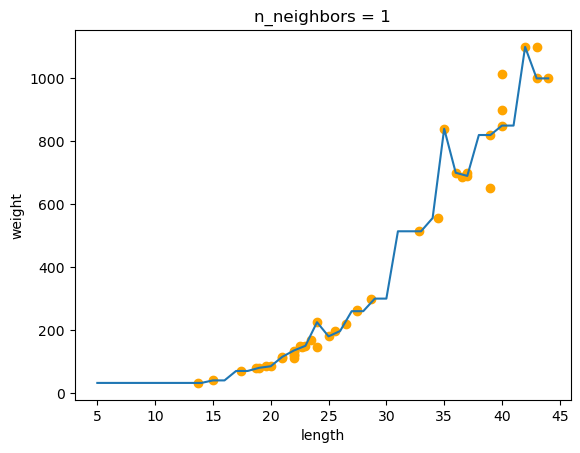

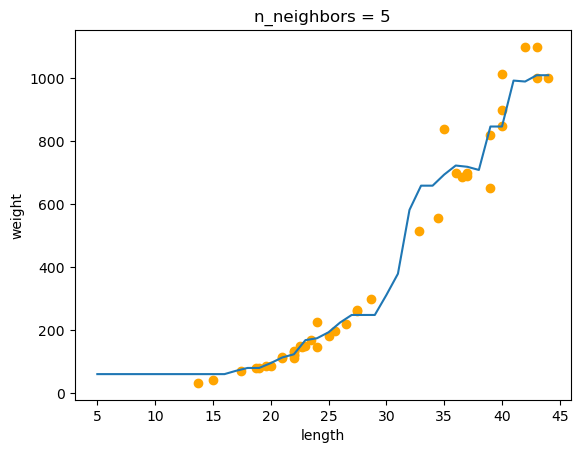

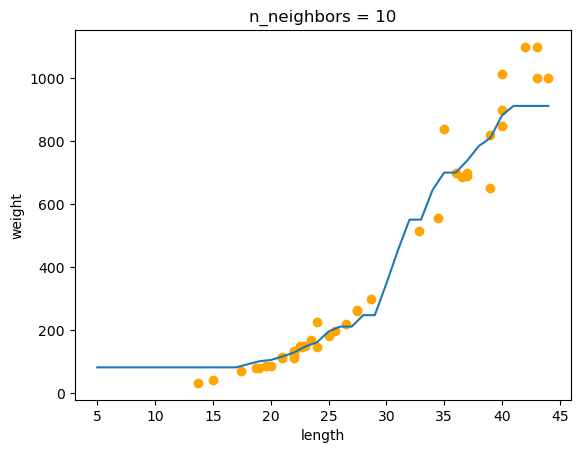

In [22]:
# k-최근접 이웃 회기 객체 생성
knr = KNeighborsRegressor()
# 5에서 45까지 x좌표 만들기
x = np.arange(5,45).reshape(-1,1)


# n = 1, 5, 10일 때 여측 결과를 그래프로 그리기
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    plt.scatter(train_input,train_target, color='orange')
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()